# Method

--------------

for momad, we simply compute: 

    - max,
    - median of medians.

Then compute: 

    - median of medians absolute deviation (that is another median of medians but subtracting the previous median from all samples)

Then we do 

    - (max - median of medians) /  (mad * x), 
    
where x is something like 1.48

--------------

# Recursive median of medians

In [1]:
def compute_mom(L):
    if len(L) < 10:
        L.sort()
        return L[int(len(L)/2)]
    S = []
    lIndex = 0
    
    for lIndex in range(0,len(L)-1,5):
        S.append(L[lIndex:lIndex+5])
    
    S.append(L[lIndex:])
    Meds = []
    
    for subList in S:
        Meds.append(compute_mom(subList))
    
    L2 = compute_mom(Meds)
    L1 = L3 = []
    
    for i in L:
        if i < L2:
            L1.append(i)
        if i > L2:
            L3.append(i)
    
    if len(L) < len(L1):
        return compute_mom(L1)
    
    elif len(L) > len(L1) + 1:
        return compute_mom(L3)
    
    else:
        return L2

# Generate SNR data

In [4]:
import numpy as np

def init_dict_list(dictionary, key):
    try: 
        dictionary[key]
    except KeyError:
        dictionary[key] = []
    return dictionary

def noise_transients_experiment(print_log=False):
    seriess = {}
    lens = []
    maxima = {}
    moms = {}
    mads = {}
    snrs = {}
    
    n_trials = 3
    trials = []
   
    n_loops = 10000
    n_samples = 2500
    counter_start = 250
    counter_end = 0
    counter_step = -25

    if print_log:
        print ("downsampling", "len", "maximum", "mom", "mad")
        
    for trial in range(n_trials):
        for i in range(n_loops):
            array = np.random.normal(0,1,n_samples)

            for downsampling in range(counter_start, counter_end, counter_step):
                series = array[::len(array)//(len(array)//downsampling)]

                # MAX
                maximum = np.nanmax(series)

                # MOMz
                mom = compute_mom(series)

                # MAD
                series_mad = series - mom
                mad = np.median(series_mad)

                if print_log:
                    print (downsampling, lens, maximum, mom, mad)

                snr = (maximum-mom)/(mad*1.48)
                if snr >= 10:
                    key = len(series)
                    if key not in lens:
                        lens.append(key)
                    init_dict_list(maxima,key)[key].append(maximum)
                    init_dict_list(moms,key)[key].append(mom)
                    init_dict_list(mads,key)[key].append(mad)
                    init_dict_list(snrs,key)[key].append(snr)
                    
        trials.append(
            {"n_loops":n_loops, 
             "n_samples":n_samples, 
             "counter_start":counter_start, 
             "counter_end":counter_end, 
             "counter_step":counter_step, 
             "seriess":seriess, 
             "lens":lens, 
             "maxima":maxima, 
             "moms":moms, 
             "mads":mads, 
             "snrs":snrs})

    return trials

In [5]:
trials = noise_transients_experiment(False)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in double_scalars


# Make figure

In [6]:
from matplotlib import pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

rc('font', size=12)
rc('axes', titlesize=14)
rc('axes', labelsize=14)

In [10]:
def figure_trigger_fraction_vs_N(trials, figure_name='trigger_fraction_vs_N', extension='.pdf'):
    fig, ax = plt.subplots()
    
    colrs = ['black', 'red', 'blue']
    i = 0

    ax.set_title("Gaussian noise data: Trigger fraction v number of samples")
    for trial in trials:
        for key in trial['lens']:
            ax.scatter(key, len(trial['snrs'][key])/trial['n_loops'], color=colrs[i])
            ax.set_xlabel("N")
            ax.set_ylabel("Trigger fraction")
        i+=1
            

    plt.savefig(figure_name + extension)

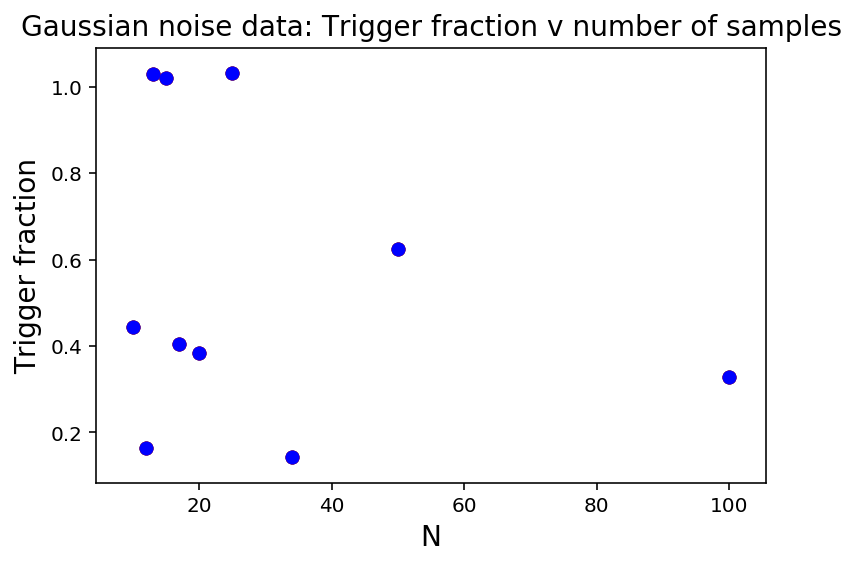

In [11]:
figure_trigger_fraction_vs_N(trials)